In [518]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from connectivity import constants as const
from connectivity.savio_scripts import script_ridge_mk as run
from connectivity import visualize_summary as vis_summary


# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [649]:
# clear connect files
run.delete_conn_files()

deleting training and evaluation connectivity data


In [725]:
# train and validate ridge model(s)

resolution = 'tesselsWB162'

# split subjects into train and hold out
train_subjs, hold_out_subjs = run.split_subjects(const.return_subjs)

for exp in ['sc1', 'sc2']:
    run.train_ridge(log_alpha=[0,2,4,6,8,10], 
                    resolution=resolution, 
                    subj_id=train_subjs, 
                    train_exp=exp)


training alpha 0
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
training alpha 2
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
training alpha 4
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Tra

<Figure size 576x576 with 0 Axes>

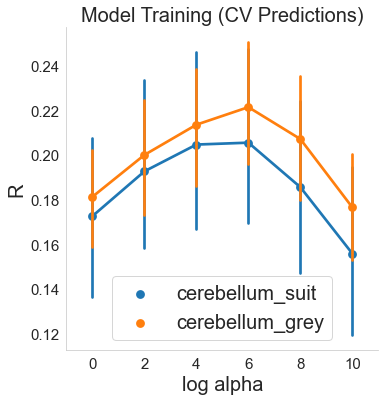

In [726]:
# plot alpha curve for train CVs

df = vis_summary.train_summary()

vis_summary.plot_train_predictions(dataframe=df, hue='train_Y_data');


In [728]:
# evaluate ridge model(s)

resolution = 'tesselsWB162'

# split subjects into train and hold out
train_subjs, hold_out_subjs = run.split_subjects(const.return_subjs)

for exp in range(2):
    run.eval_ridge(log_alpha=[6], 
                   resolution=resolution, 
                   subj_id=train_subjs, 
                   train_exp=f'sc{2-exp}', 
                   eval_exp=f'sc{exp+1}')
    

evaluating alpha 6
Evaluating model on s02
Evaluating model on s03
Evaluating model on s09
Evaluating model on s10
Evaluating model on s12
Evaluating model on s15
Evaluating model on s17
Evaluating model on s18
Evaluating model on s19
Evaluating model on s20
Evaluating model on s24
Evaluating model on s25
Evaluating model on s27
Evaluating model on s28
Evaluating model on s29
Evaluating model on s30
Evaluating model on s31
evaluating alpha 6
Evaluating model on s02
Evaluating model on s03
Evaluating model on s09
Evaluating model on s10
Evaluating model on s12
Evaluating model on s15
Evaluating model on s17
Evaluating model on s18
Evaluating model on s19
Evaluating model on s20
Evaluating model on s24
Evaluating model on s25
Evaluating model on s27
Evaluating model on s28
Evaluating model on s29
Evaluating model on s30
Evaluating model on s31


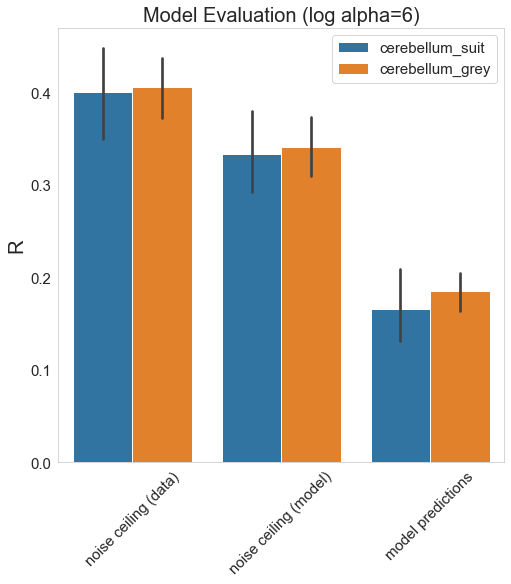

In [730]:
# Model evaluation (noise ceiling and predictions)

df_eval = vis_summary.eval_summary()

vis_summary.plot_eval_predictions(dataframe=df_eval, best_alpha=6, hue='eval_Y_data')
